--- Logistic Regression ---
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       583
         Low       0.93      1.00      0.96      7660

    accuracy                           0.93      8243
   macro avg       0.46      0.50      0.48      8243
weighted avg       0.86      0.93      0.90      8243

Accuracy: 0.9292733228193619


/Users/guillaumedeboissiere/Library/Mobile Documents/com~apple~CloudDocs/Data Analysis/paris_road_safety_dashboard/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guillaumedeboissiere/Library/Mobile Documents/com~apple~CloudDocs/Data Analysis/paris_road_safety_dashboard/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guillaumedeboissiere/Library/Mobile Documents/com~apple~CloudDocs/Data Analysis/paris_road_safety_dashboard/venv/lib/python3.12/site-packages

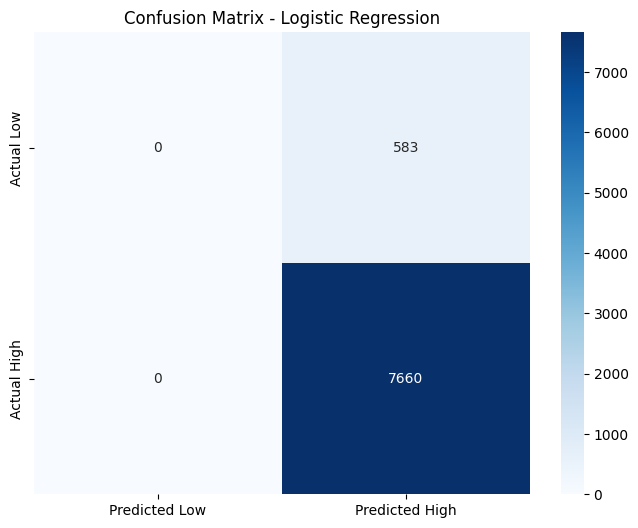

--- Decision Tree ---
              precision    recall  f1-score   support

        High       0.12      0.12      0.12       583
         Low       0.93      0.93      0.93      7660

    accuracy                           0.87      8243
   macro avg       0.53      0.53      0.53      8243
weighted avg       0.88      0.87      0.87      8243

Accuracy: 0.8729831372073275


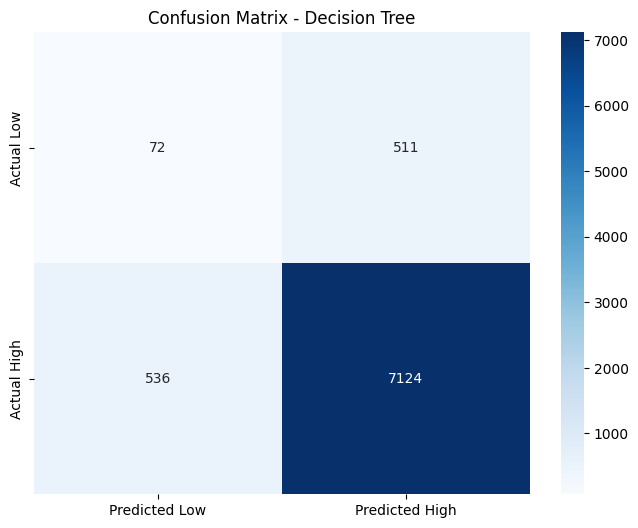

--- Random Forest ---
              precision    recall  f1-score   support

        High       0.15      0.02      0.04       583
         Low       0.93      0.99      0.96      7660

    accuracy                           0.92      8243
   macro avg       0.54      0.51      0.50      8243
weighted avg       0.87      0.92      0.89      8243

Accuracy: 0.9218731044522626


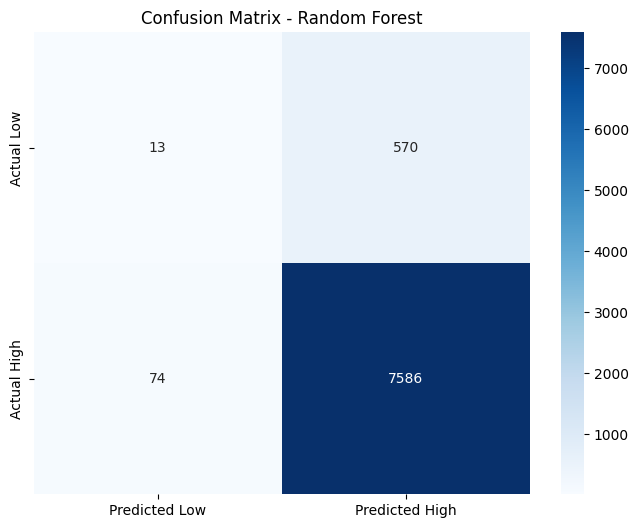

--- SVM ---
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       583
         Low       0.93      1.00      0.96      7660

    accuracy                           0.93      8243
   macro avg       0.46      0.50      0.48      8243
weighted avg       0.86      0.93      0.90      8243

Accuracy: 0.9292733228193619


/Users/guillaumedeboissiere/Library/Mobile Documents/com~apple~CloudDocs/Data Analysis/paris_road_safety_dashboard/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guillaumedeboissiere/Library/Mobile Documents/com~apple~CloudDocs/Data Analysis/paris_road_safety_dashboard/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guillaumedeboissiere/Library/Mobile Documents/com~apple~CloudDocs/Data Analysis/paris_road_safety_dashboard/venv/lib/python3.12/site-packages

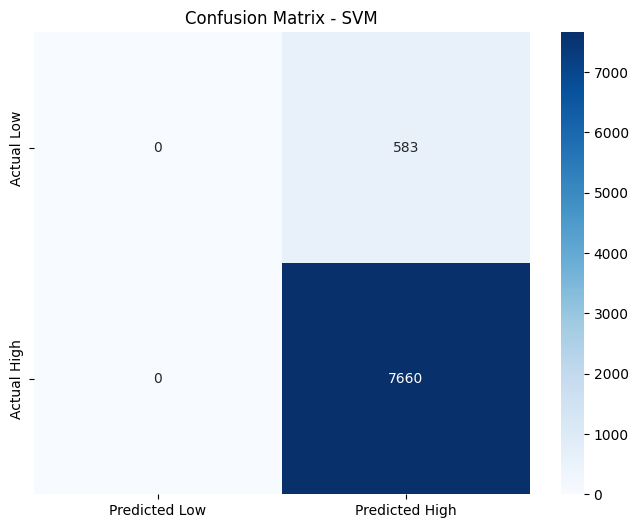

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['High' 'Low']

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# --- Data Loading and Preprocessing ---

# Load the dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv ('../data/accidents_parsed.csv', sep=';')

# Feature Engineering: Create a simplified 'Severity' for binary classification
df['Severity_Binary'] = df['Severity'].apply(lambda x: 'High' if x == 'Blessé hospitalisé' else 'Low')

# Drop rows where 'Severity_Binary' is missing
df.dropna(subset=['Severity_Binary'], inplace=True)

# Define features (X) and target (y)
features = ['TransportMode', 'AgeGroup', 'Gender', 'Environment', 'District_code',
            'intersection_type', 'lighting_condition', 'weather_condition',
            'road_surface', 'first_vehicle', 'max_speed', 'first_vehicle_driver_sex',
            'first_vehicle_driver_age']
target = 'Severity_Binary'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Preprocessing Pipeline ---

# Numerical features: impute missing values with median and scale
numerical_features = ['max_speed', 'first_vehicle_driver_age']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features: impute missing values with 'missing' and one-hot encode
categorical_features = ['TransportMode', 'AgeGroup', 'Gender', 'Environment', 'District_code',
                        'intersection_type', 'lighting_condition', 'weather_condition',
                        'road_surface', 'first_vehicle', 'first_vehicle_driver_sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# --- Model Training and Evaluation ---

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),  # Increase max_iter if needed
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    # Create a pipeline with preprocessor and current model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the model
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Low', 'Predicted High'],
                yticklabels=['Actual Low', 'Actual High'])
    plt.title(f"Confusion Matrix - {name}")
    plt.show()